## Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g6MFwuUYBYZO4MBwe4jVpAsswy0ndt0Ne0bt8rJkdB49wqo1WHlw2U


ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

datasets = ["STANFORD", "SEMEVAL", "PHEME"]

root = "/content/gdrive/My Drive/ContradictionDetection/data/Dataset/"
train_file = "01 TRAINING FILE.txt"
test_file = "02 TESTING FILE.txt"

In [ ]:
train_data = pd.read_csv(root + datasets[1] + "/" + train_file, sep="\t", encoding = "ISO-8859-1")
test_data = pd.read_csv(root + datasets[1] + "/" + test_file, sep="\t", encoding="ISO-8859-1")

In [ ]:
train_data.head()

In [ ]:
test_data.head()

## EDA

In [ ]:
print("TRAIN SHAPE: ", train_data.shape)
print("TEST SHAPE: ", test_data.shape)

TRAIN SHAPE:  (3822, 8)
TEST SHAPE:  (3513, 8)


In [ ]:
def counts(df):
  print(df.groupby("SENTENCE TYPE")['NEGATION'].value_counts())
  print()
  print(df.groupby("SENTENCE TYPE")['ANTONYM'].value_counts())

In [ ]:
counts(train_data)
print("\n======================")
counts(test_data)
print("\n=====================")
counts(df_stanford)

NEGATION  SENTENCE TYPE
0         0                2146
          1                 313
1         1                 972
          0                 391
Name: SENTENCE TYPE, dtype: int64

ANTONYM  SENTENCE TYPE
0        0                2376
         1                1116
1        1                 169
         0                 161
Name: SENTENCE TYPE, dtype: int64

NEGATION  SENTENCE TYPE
0         0                2400
          1                 114
1         1                 606
          0                 393
Name: SENTENCE TYPE, dtype: int64

ANTONYM  SENTENCE TYPE
0        0                2620
         1                 655
1        0                 173
         1                  65
Name: SENTENCE TYPE, dtype: int64

NEGATION  SENTENCE TYPE
0         0                1923
          1                 284
1         0                 152
          1                  41
Name: SENTENCE TYPE, dtype: int64

ANTONYM  SENTENCE TYPE
0        0                2072
         1           

In [ ]:
cols = ["SENTENCE TYPE", "NEGATION", "ANTONYM"]
for i in cols:
  temp = train_data[i].value_counts()
  print(temp)
  print('\n')

neutral          2537
contradiction    1285
Name: SENTENCE TYPE, dtype: int64


False    2459
True     1363
Name: NEGATION, dtype: int64


0    3492
1     330
Name: ANTONYM, dtype: int64




In [ ]:
for i in cols:
  temp = test_data[i].value_counts()
  print(temp)
  print('\n')

neutral          2793
contradiction     720
Name: SENTENCE TYPE, dtype: int64


False    2514
True      999
Name: NEGATION, dtype: int64


0    3275
1     238
Name: ANTONYM, dtype: int64




In [ ]:
print("TRAIN IOOU AVG:", np.mean(train_data['IOOU']))
print("TRAIN OVERLAP COEFF AVG:", np.mean(train_data['OVERLAP COEFFICIENT']))
print("TEST IOOU AVG:", np.mean(test_data['IOOU']))
print("TEST OVERLAP COEFF AVG:", np.mean(test_data['OVERLAP COEFFICIENT']))

TRAIN IOOU AVG: 0.47557908090031525
TRAIN OVERLAP COEFF AVG: 0.13059622643851398
TEST IOOU AVG: 0.43219691734614263
TEST OVERLAP COEFF AVG: 0.12256523856504445


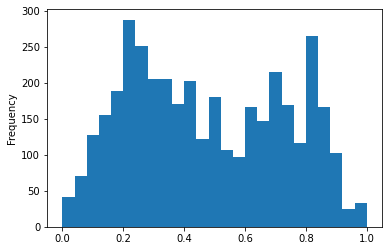

In [ ]:
train_data['IOOU'].plot.hist(bins=25)

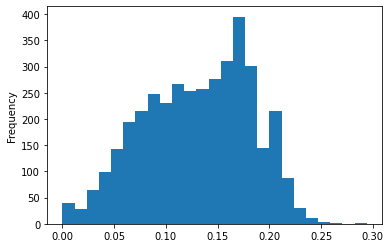

In [ ]:
train_data['OVERLAP COEFFICIENT'].plot.hist(bins=25)

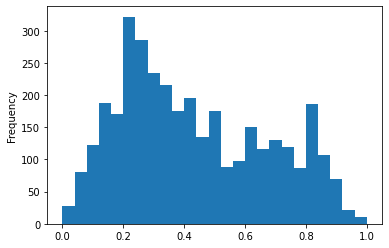

In [ ]:
test_data['IOOU'].plot.hist(bins=25)

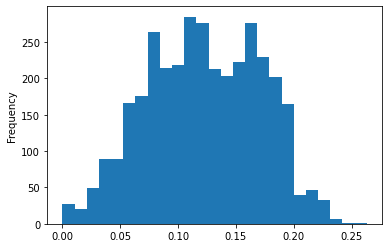

In [ ]:
test_data['OVERLAP COEFFICIENT'].plot.hist(bins=25)

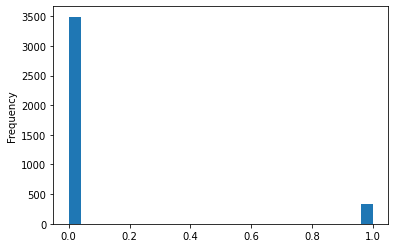

In [ ]:
train_data['ANTONYM'].plot.hist(bins=25)

In [ ]:
train_data[''].plot.hist(bins=25)

KeyError: ignored

In [ ]:
print("TRAIN AVG WORD COUNT A:",np.mean(train_data['SENTENCE A'].apply(str.split).apply(len)))
print("TEST AVG WORD COUNT A:",np.mean(test_data['SENTENCE A'].apply(str.split).apply(len)))
print("TRAIN AVG WORD COUNT B:",np.mean(train_data['SENTENCE B'].apply(str.split).apply(len)))
print("TEST AVG WORD COUNT B:",np.mean(test_data['SENTENCE B'].apply(str.split).apply(len)))

print()

print("TRAIN MIN WORD COUNT A:",np.min(train_data['SENTENCE A'].apply(str.split).apply(len)))
print("TEST MIN WORD COUNT A:",np.min(test_data['SENTENCE A'].apply(str.split).apply(len)))
print("TRAIN MIN WORD COUNT B:",np.min(train_data['SENTENCE B'].apply(str.split).apply(len)))
print("TEST MIN WORD COUNT B:",np.min(test_data['SENTENCE B'].apply(str.split).apply(len)))

print()

print("TRAIN MAX WORD COUNT A:",np.max(train_data['SENTENCE A'].apply(str.split).apply(len)))
print("TEST MAX WORD COUNT A:",np.max(test_data['SENTENCE A'].apply(str.split).apply(len)))
print("TRAIN MAX WORD COUNT B:",np.max(train_data['SENTENCE B'].apply(str.split).apply(len)))
print("TEST MAX WORD COUNT B:",np.max(test_data['SENTENCE B'].apply(str.split).apply(len)))

## Pre-processing

In [ ]:
# Replace SENTENCE TYPE "contradiction" -- > 1 "neutral" --> 0
# Replace NEGATION True --> 1 False --> 0
train_data['SENTENCE TYPE'] = train_data['SENTENCE TYPE'].map({'contradiction': 1, "neutral": 0}, na_action='ignore')
test_data['SENTENCE TYPE'] = test_data['SENTENCE TYPE'].map({'contradiction': 1, "neutral": 0}, na_action='ignore')

train_data['NEGATION'] = train_data['NEGATION'].map({True: 1, False: 0}, na_action='ignore')
test_data['NEGATION'] = test_data['NEGATION'].map({True: 1, False: 0}, na_action='ignore')

In [ ]:
train_data.head()

,S.NO.,SENTENCE A,SENTENCE B,SENTENCE TYPE,IOOU,NEGATION,ANTONYM,OVERLAP COEFFICIENT
0,1,the dough used for pancakes is thin,the dough used for pancakes is thick,1,0.750000,0,1,0.171429
1,2,she showed him my ugly picture,she showed him my handsome picture,1,0.714286,0,1,0.166667
2,3,i only need the healthy half,i only need the bad half,1,0.714286,0,1,0.208333
3,4,i cant confidently tell you yet,i cant diffidently tell you yet,1,0.714286,0,1,0.161290
4,5,i need to be sure,i do not need to be sure,1,0.714286,1,0,0.294118


In [ ]:
test_data.head()

,S.NO.,SENTENCE A,SENTENCE B,SENTENCE TYPE,IOOU,NEGATION,ANTONYM,OVERLAP COEFFICIENT
0,1,there is no boy playing outdoors and there is ...,a group of kids is playing in a yard and an ol...,0,0.200000,1,0,0.066667
1,2,a group of boys in a yard is playing and a man...,the young boys are playing outdoors and the ma...,0,0.333333,0,0,0.092308
2,3,a group of children is playing in the house an...,the young boys are playing outdoors and the ma...,0,0.238095,1,0,0.076923
3,5,a brown dog is attacking another animal in fro...,a brown dog is helping another animal in front...,0,0.857143,0,0,0.181818
4,6,two dogs are wrestling and hugging,there is no dog wrestling and hugging,1,0.300000,1,0,0.088235


## GloVe

In [ ]:
#!wget  http://nlp.stanford.edu/data/glove.6B.zip -P /content/gdrive/My\ Drive/ContradictionDetection

In [ ]:
#!unzip /content/gdrive/My\ Drive/ContradictionDetection/glove.6B.zip -d /content/gdrive/My\ Drive/ContradictionDetection

In [ ]:
embeddings_dict = {}
with open("/content/gdrive/My Drive/ContradictionDetection/lib/glove/glove.6B.300d.txt", 'r', encoding="utf-8") as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict[word] = vector

In [ ]:
def get_avg_embedding(sentence):
  # np.sum(embeddings_dict[w]) * ((1/len(s)) if len(s) > 0 else 1)
  sentence = sentence.lower()
  sentence = sentence.translate(str.maketrans('', '', string.punctuation))
  idx = [embeddings_dict[w] for w in sentence.split() if w in embeddings_dict]
  if len(idx) == 0:
    return []
  v = np.sum(idx, axis=0)
  if len(idx) > 0:
    v *= 1/len(idx)
  
  return v

In [ ]:
def get_full_embedding(sentence):
  sentence = sentence.lower()
  sentence = sentence.translate(str.maketrans('', '', string.punctuation))
  idx = [embeddings_dict[w] for w in sentence.split() if w in embeddings_dict]
  return np.array(idx)

In [ ]:
def get_unaligned(a, b):
  a = a.split()
  b = b.split()

  i = 0
  while i < len(a):
    if a[i] in b:
      b.remove(a[i])
      a.remove(a[i])
      i -= 1
    i += 1

  return a,b

## NN Models

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### CNN

#### Functions

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(4, 300, 7)
    self.mp = nn.MaxPool2d(2,2)
    #ReLu
    self.fc1 = nn.Linear(147*17*300, 50)  #4 for the extra data inputs
    #tanH
    self.fc2 = nn.Linear(50 + 4, 2)
    #softmax
  
  def forward(self, x, data):
    # print("ORIG:", x.shape, data.shape)
    x = self.mp(F.relu(self.conv1(x)))
    x = x.view(1,-1)
    # print("FIRST:", x.shape, data.shape)
    x = F.tanh(self.fc1(x))
    # print("RIGHTB4:", x.shape, data.shape)
    xcat = torch.cat((x, data), dim=1)
    # print("XCAT:", xcat.shape)
    out = self.fc2(xcat)
    # print("FINAL:", out.shape)
    return out
    

In [ ]:
def get_input(sent_a, sent_b):
  input_shape = (4, 40,300)
  input = np.zeros(input_shape)
  unaligned_a, unaligned_b = get_unaligned(sent_a, sent_b)
  layer1, layer2 = get_full_embedding(sent_a), get_full_embedding(sent_b)
  layer3, layer4 = get_full_embedding(" ".join(unaligned_a)), get_full_embedding(" ".join(unaligned_b))
  # print(layer1.shape, layer2.shape, layer3.shape, layer4.shape)
  if layer1.shape[0] > 0: input[0, :min(layer1.shape[0], 40)] = layer1[:min(layer1.shape[0], 40)]
  if layer2.shape[0] > 0: input[1, :min(layer2.shape[0], 40)] = layer2[:min(layer2.shape[0], 40)]
  if layer3.shape[0] > 0: input[2, :min(layer3.shape[0], 40)] = layer3[:min(layer3.shape[0], 40)]
  if layer4.shape[0] > 0: input[3, :min(layer4.shape[0], 40)] = layer4[:min(layer4.shape[0], 40)]
  return input.reshape((1,4,40,300))

def get_params(row):
  sent_a = row['SENTENCE A']
  sent_b = row['SENTENCE B']
  input = get_input(sent_a, sent_b)
  feat = np.array([row['IOOU'], row['NEGATION'], row['ANTONYM'], row['OVERLAP COEFFICIENT']])
  target = row['SENTENCE TYPE']

  return input, feat.reshape((1, feat.shape[0])), np.array([target])



In [ ]:
def run(model, df, num_epochs, criterion, optimizer):
  for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    for i,row in df.iterrows():
      input, feat, target = get_params(row)
      target = torch.from_numpy(target).long().to(device)

      optimizer.zero_grad()
      
      outputs = model(torch.from_numpy(input).float().to(device), torch.from_numpy(feat).float().to(device))
      loss = criterion(outputs, target)
      loss.backward()
      optimizer.step()

      correct += (torch.argmax(outputs) == target).item()

      running_loss += loss.item()

    acc = 100 * correct/df.shape[0]
    val_loss, val_acc = test(model, val_split, criterion)
    
    print('epoch %d loss: %.3f val_loss: %.3f train_acc: %.3f val_acc: %.3f' % (epoch + 1, running_loss/df.shape[0], val_loss, acc, val_acc))

  return model


In [ ]:
def test(model, df, criterion):
  one_correct = 0
  zero_correct = 0
  type_one = 0
  type_two = 0
  running_loss = 0.0
  with torch.no_grad():
    for i,row in df.iterrows():
      input, feat, target = get_params(row)
      target = torch.from_numpy(target).long().to(device)

      outputs = model(torch.from_numpy(input).float().to(device), torch.from_numpy(feat).float().to(device))
      loss = criterion(outputs, target)
      if target == 1:
        if torch.argmax(outputs) == target:
          one_correct += 1
        else:
          type_two += 1
      else:
        if torch.argmax(outputs) == target:
          zero_correct += 1
        else:
          type_one += 1
      running_loss += loss.item()
    
    one_acc = 100 * one_correct/df.loc[df['SENTENCE TYPE'] == 1].shape[0]
    type_one = 100 * (type_one/df.loc[df['SENTENCE TYPE'] == 0].shape[0])
    zero_acc = 100 * zero_correct/df.loc[df['SENTENCE TYPE'] == 0].shape[0]
    type_two = 100 * (type_two/df.loc[df['SENTENCE TYPE'] == 1].shape[0])
    correct = one_correct + zero_correct
    acc = 100 * correct/df.shape[0]

    # print("Accuracy: {}".format(acc))
    return running_loss/df.shape[0], acc, [[one_acc, type_one], [type_two, zero_acc]]

## Training


In [ ]:
model = Net()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
model = run(model, train_data, 25, criterion, optimizer)
test(model, test_split, criterion)

KeyboardInterrupt: ignored

In [ ]:
model = Net()
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)
model = run(model, train_data, 5, criterion, optimizer)
optimizer = optim.SGD(model.parameters(), lr=1e-3)
model = run(model, train_data, 5, criterion, optimizer)
test(model, test_split, criterion)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch 1 loss: 0.532 val_loss: 5725.549 train_acc: 85.714 val_acc: 21.195
epoch 2 loss: 0.410 val_loss: 6666.092 train_acc: 89.979 val_acc: 21.195
epoch 3 loss: 0.418 val_loss: 7464.914 train_acc: 90.476 val_acc: 21.195
epoch 4 loss: 0.429 val_loss: 8054.381 train_acc: 90.921 val_acc: 21.195
epoch 5 loss: 0.436 val_loss: 8128.680 train_acc: 91.104 val_acc: 21.195
epoch 1 loss: 0.802 val_loss: 714.655 train_acc: 86.185 val_acc: 78.378
epoch 2 loss: 0.477 val_loss: 710.622 train_acc: 89.403 val_acc: 78.378
epoch 3 loss: 0.471 val_loss: 707.334 train_acc: 89.534 val_acc: 78.236
epoch 4 loss: 0.465 val_loss: 704.573 train_acc: 89.560 val_acc: 77.383
epoch 5 loss: 0.459 val_loss: 702.311 train_acc: 89.717 val_acc: 76.529


(2681.626048311009, 77.29537366548043)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1e-4)
model = run(model, train_data, 100, criterion, optimizer)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch 1 loss: 0.522 val_loss: 0.361 train_acc: 88.017 val_acc: 89.758
epoch 2 loss: 0.521 val_loss: 0.361 train_acc: 88.017 val_acc: 89.758
epoch 3 loss: 0.521 val_loss: 0.360 train_acc: 88.043 val_acc: 89.758
epoch 4 loss: 0.520 val_loss: 0.360 train_acc: 88.043 val_acc: 89.758
epoch 5 loss: 0.519 val_loss: 0.360 train_acc: 88.069 val_acc: 89.758
epoch 6 loss: 0.519 val_loss: 0.359 train_acc: 88.069 val_acc: 89.758
epoch 7 loss: 0.518 val_loss: 0.359 train_acc: 88.043 val_acc: 89.616
epoch 8 loss: 0.518 val_loss: 0.359 train_acc: 88.017 val_acc: 89.616
epoch 9 loss: 0.517 val_loss: 0.359 train_acc: 88.017 val_acc: 89.616
epoch 10 loss: 0.516 val_loss: 0.358 train_acc: 88.043 val_acc: 89.616
epoch 11 loss: 0.516 val_loss: 0.358 train_acc: 88.095 val_acc: 89.616
epoch 12 loss: 0.515 val_loss: 0.358 train_acc: 88.095 val_acc: 89.616
epoch 13 loss: 0.514 val_loss: 0.358 train_acc: 88.121 val_acc: 89.616
epoch 14 loss: 0.514 val_loss: 0.357 train_acc: 88.174 val_acc: 89.616
epoch 15 loss: 

KeyboardInterrupt: ignored

In [ ]:
test(model, test_split, criterion)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


(0.3264854631145147, 90.4626334519573)

In [ ]:
PATH = "/content/gdrive/My Drive/ContradictionDetection/overtrained.pt"
model_load = torch.load(PATH)
print(test(model_load, train_data, criterion))
print(test(model_load, test_split, criterion))
print(test(model_load, val_split, criterion))
print(test(model_load, test_data, criterion))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


(0.4874907182916789, 87.67660910518053)
(0.3264854631145147, 90.4626334519573)
(0.35000521689703473, 89.61593172119488)
(0.3311920918959299, 90.29319669797894)


In [ ]:
# optimizer = optim.SGD(model.parameters(), lr=0.1)
# model = run(model, train_data, 25, criterion, optimizer)
optimizer = optim.SGD(model.parameters(), lr=1e-3)
model = run(model, train_data, 50, criterion, optimizer)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch 1 loss: 0.848 train_acc: 86.028 val_acc: 78.521
epoch 2 loss: 0.501 train_acc: 89.482 val_acc: 78.521
epoch 3 loss: 0.494 train_acc: 89.508 val_acc: 78.378
epoch 4 loss: 0.488 train_acc: 89.691 val_acc: 78.663
epoch 5 loss: 0.483 train_acc: 89.717 val_acc: 78.663
epoch 6 loss: 0.478 train_acc: 89.927 val_acc: 77.952
epoch 7 loss: 0.473 train_acc: 90.058 val_acc: 77.525
epoch 8 loss: 0.469 train_acc: 90.058 val_acc: 77.098
epoch 9 loss: 0.464 train_acc: 90.058 val_acc: 76.671
epoch 10 loss: 0.460 train_acc: 89.953 val_acc: 76.529
epoch 11 loss: 0.457 train_acc: 89.927 val_acc: 76.529


KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import train_test_split

test_split, val_split = train_test_split(test_data, test_size=0.2)

In [ ]:
test(model, test_split, criterion)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


(0.3439591133146915,
 90.6049822064057,
 [[84.8695652173913, 7.919463087248323],
  [15.130434782608695, 92.08053691275168]])

## Generalization Testing

In [ ]:
model = torch.load("/content/gdrive/My Drive/ContradictionDetection/models/moretrained.pt")
model.to(device)

Net(
  (conv1): Conv2d(4, 300, kernel_size=(7, 7), stride=(1, 1))
  (mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=749700, out_features=50, bias=True)
  (fc2): Linear(in_features=54, out_features=2, bias=True)
)

### Feature Functions

In [ ]:
# Antonyms
antonyms = {}
datapath = "/content/gdrive/My Drive/ContradictionDetection/data/"
with open(datapath + "antonyms.csv") as f:
  for line in f:
    arr = line.strip().split(', ')
    antonyms[arr[0]] = arr[1:]
  del antonyms["Root"]

In [ ]:
import string
def remove_punct_col(s):
  for i in string.punctuation:
    s = s.replace(i, "")
  return s

def get_IOOU(a, b):
  diff_a, diff_b = get_unaligned(a,b)
  len_a = len(a.split())
  len_b = len(b.split())
  num = (len_a - len(diff_a)) + (len_b - len(diff_b)) # commonA + commonB
  denom = len_a + len_b + 2
  return num/denom

def get_negation(a, b):
  neg = {'no', 'never', 'not', 'nothing', 'no one', 'without', 'nobody'}
  is_neg = False
  a_set = set(a.split())
  b_set = set(b.split())
  is_neg = True if len(a_set.intersection(neg)) > 0 else False
  is_neg = not is_neg if len(b_set.intersection(neg)) > 0 else is_neg
  
  if is_neg:
    return 1
  return 0

def get_antonym(a,b):
  is_ant = False
  for i in a.split():
    if i in antonyms:
      is_ant = any(item in b.split() for item in antonyms[i]) #checks if any corresponding antonym is in the other sentence
  
  if is_ant:
    return 1
  return 0

def get_overlap(a,b):
  diff_a, diff_b = get_unaligned(a,b)
  return (len(diff_a)/len(a) + len(diff_b)/len(b))/2
  

In [ ]:
def calc_feats(df):
  df['SENTENCE A'] = df['SENTENCE A'].apply(lambda s: remove_punct_col(s))
  df['SENTENCE B'] = df['SENTENCE B'].apply(lambda s: remove_punct_col(s))
  df['SENTENCE A'] = df['SENTENCE A'].apply(lambda s: remove_punct_col(s))
  df['SENTENCE B'] = df['SENTENCE B'].apply(lambda s: remove_punct_col(s))
  df['IOOU'] = df.apply(lambda row: get_IOOU(row['SENTENCE A'], row['SENTENCE B']), axis=1)
  df['NEGATION'] = df.apply(lambda row: get_negation(row['SENTENCE A'], row['SENTENCE B']), axis=1)
  df['ANTONYM'] = df.apply(lambda row: get_antonym(row['SENTENCE A'], row['SENTENCE B']), axis=1)
  df['OVERLAP COEFFICIENT'] = df.apply(lambda row: get_overlap(row['SENTENCE A'], row['SENTENCE B']), axis=1)
  return df

### Stanford Dataset

In [ ]:
datapath = "/content/gdrive/My Drive/ContradictionDetection/data/"
df1 = pd.read_csv(datapath + "StanfordTest/Stanford_test_1.csv")
df2 = pd.read_csv(datapath + "StanfordTest/Stanford_test_2.csv")
df3 = pd.read_csv(datapath + "StanfordTest/Stanford_test_3.csv")

In [ ]:
df_stanford = df1.append(df2, ignore_index=True)
df_stanford = df_stanford.append(df3, ignore_index = True)
df_stanford = df_stanford.drop(columns=['_length', '_id', '_task'])
df_stanford

,t,h,_entailment
0,Mexico City has a very bad pollution problem b...,Poor air circulation out of the mountain-walle...,YES
1,Satomi Mitarai died of blood loss.,Satomi Mitarai bled to death.,YES
2,"The national insurrection of 1794, led by Tade...",Warsaw became a town in Prussia.,YES
3,The city Tenochtitlan grew rapidly and was the...,"Tenochtitlan quickly spread over the island, m...",UNKNOWN
4,Militant groups in Iraq have waged a kidnappin...,About 70 foreigners have been abducted by mili...,UNKNOWN
...,...,...,...
2395,It has pledged to allow the yuan to float more...,China has an export-led economy.,YES
2396,Last year the US saw exports of goods and serv...,US exports rose 10.5%.,NO
2397,"The world's largest consumer of oil, US import...",There was a conflict between Israel and Lebanon.,UNKNOWN
2398,"Away from the Olympic site, near the bricks an...",Aliens have been seen near the Forbidden City.,UNKNOWN


In [ ]:
df_stanford['_entailment'] = df_stanford['_entailment'].map({"YES": 0, "UNKNOWN": 0, "NO": 1}, na_action='ignore')
df_stanford['_entailment'].value_counts()

0    2075
1     325
Name: _entailment, dtype: int64

In [ ]:
df_stanford.rename(columns={'t': 'SENTENCE A', 'h': 'SENTENCE B', '_entailment': 'SENTENCE TYPE'}, inplace=True)
df_stanford = calc_feats(df_stanford)

In [ ]:
criterion = nn.CrossEntropyLoss()
test(model, df_stanford, criterion)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


(1.4597353805471076,
 85.41666666666667,
 [[3.076923076923077, 1.6867469879518073],
  [96.92307692307692, 98.3132530120482]])

In [ ]:
criterion = nn.CrossEntropyLoss()
test(model, test_data, criterion)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


(0.3416434333396984,
 90.66325078280671,
 [[85.0, 7.876834944504117], [15.0, 92.12316505549589]])

In [ ]:
criterion = nn.CrossEntropyLoss()
test(model, train_data, criterion)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


(0.5254411227234648,
 87.78126635269493,
 [[81.78988326848248, 9.184075679936933],
  [18.21011673151751, 90.81592432006306]])

### PHEME Dataset

In [ ]:
datapath = "/content/gdrive/My Drive/ContradictionDetection/data/"
df_pheme = pd.read_csv(datapath + "pheme_test_leave_chebdo.csv")


In [ ]:
df_pheme['_entailment'] = df_pheme['_entailment'].map({"ENTAILMENT": 0, "UNKNOWN": 0, "CONTRADICTION": 1}, na_action='ignore')
df_pheme.rename(columns={'t': 'SENTENCE A', 'h': 'SENTENCE B', '_entailment': 'SENTENCE TYPE'}, inplace=True)
df_pheme = calc_feats(df_pheme)
df_pheme.drop(columns=['_id', '_rte_type', '_rumours'], inplace=True)

In [ ]:
df_pheme.head()

,SENTENCE A,SENTENCE B,SENTENCE TYPE,IOOU,NEGATION,ANTONYM,OVERLAP COEFFICIENT
0,There are reports of an armed incident at the ...,Breaking automatic gunfire reported at Montrou...,1,0.228571,0,0,0.122930
1,French media report the Trocadero near the Eif...,Breaking automatic gunfire reported at Montrou...,1,0.210526,0,0,0.123831
2,Breaking automatic gunfire reported at Montrou...,Trocadero square in Paris evacuated Policemen ...,1,0.200000,0,0,0.114892
3,Breaking automatic gunfire reported at Montrou...,BREAKING Trocadero square in Paris is evacuate...,1,0.250000,0,0,0.112784
4,Breaking automatic gunfire reported at Montrou...,UPDATE Security alert in Trocadero near the Ei...,1,0.176471,0,0,0.132749


In [ ]:
df_stanford.head()

,SENTENCE A,SENTENCE B,SENTENCE TYPE,IOOU,NEGATION,ANTONYM,OVERLAP COEFFICIENT
0,Mexico City has a very bad pollution problem b...,Poor air circulation out of the mountainwalled...,0,0.222222,0,0,0.122173
1,Satomi Mitarai died of blood loss,Satomi Mitarai bled to death,0,0.307692,0,0,0.114177
2,The national insurrection of 1794 led by Tadeu...,Warsaw became a town in Prussia,0,0.181818,0,0,0.098648
3,The city Tenochtitlan grew rapidly and was the...,Tenochtitlan quickly spread over the island ma...,0,0.240000,0,0,0.117137
4,Militant groups in Iraq have waged a kidnappin...,About 70 foreigners have been abducted by mili...,0,0.216216,0,0,0.118534


In [ ]:
df_pheme['SENTENCE TYPE'].value_counts()

0    1513
1     427
Name: SENTENCE TYPE, dtype: int64

In [ ]:
criterion = nn.CrossEntropyLoss()
test(model, df_pheme, criterion)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


(2.8019457498501907,
 78.04123711340206,
 [[0.234192037470726, 0.0], [99.76580796252928, 100.0]])

## K-d tree KNN

In [ ]:
from sklearn.neighbors import KDTree
df = df_stanford
tree = KDTree(np.array(list(df['SENTENCE A'].apply(get_avg_embedding).values)))

In [ ]:
loc = 3
df['SENTENCE B'][loc]

'i cant diffidently tell you yet'

In [ ]:
dist, ind = tree.query(list(df['SENTENCE B'].apply(get_avg_embedding).values), k=40)
tot = 0
for i in range(df.shape[0]):
  if i in ind[i]:
    tot += 1
100 * tot/df.shape[0]
# print(df['SENTENCE A'][ind[0]])
# print(dist[0])

93.625

In [ ]:
tree.get_tree_stats()

(0, 76800, 74400)

## R*-Tree

In [ ]:
!apt install libspatialindex-dev
!pip install rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (736 kB/s)
Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_

In [ ]:
def generator_function():
  
  for i, obj in enumerate(list(df['SENTENCE A'].apply(get_avg_embedding).values)):
    # print(i, obj)
    # print(i)
    yield (i, list(obj), None)

In [ ]:
from rtree import index
from rtree.index import Rtree
df = train_data
p = index.Property()
p.dimension = 300
p.leaf_capacity = 100000
idx = index.Index(properties=p)


for i in range(df.shape[0]):
  idx.insert(i, list(get_avg_embedding(df['SENTENCE A'][i])))

In [ ]:
from time import time
acc = []
searchtime = []
vals = [2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,80,100,120,150,200]
for k in vals:
  tic = time()
  tot = 0
  for i in range(df.shape[0]):
    if df['SENTENCE TYPE'][i] != 1: continue
    hits = idx.nearest(list(get_avg_embedding(df['SENTENCE B'][i])), k, objects=False)
    if i in list(hits):
      tot += 1
  toc = time()
  acc1 = 100 * tot/df['SENTENCE TYPE'].value_counts()[1]
  acc.append(acc1)
  searchtime.append(toc-tic)
  print("KNN with", k, ": acc - ", acc1, "time - ", toc-tic)
print(acc)
print(searchtime)

KNN with 2 : acc -  49.494163424124515 time -  31.175036668777466
KNN with 3 : acc -  64.5136186770428 time -  32.495962381362915
KNN with 4 : acc -  71.67315175097276 time -  32.067134618759155
KNN with 5 : acc -  74.63035019455253 time -  32.257848262786865
KNN with 6 : acc -  76.73151750972762 time -  32.86642909049988
KNN with 7 : acc -  77.8988326848249 time -  32.4691002368927
KNN with 8 : acc -  78.75486381322958 time -  32.20931363105774
KNN with 9 : acc -  79.45525291828794 time -  32.29698443412781
KNN with 10 : acc -  80.23346303501945 time -  32.55500841140747
KNN with 15 : acc -  83.11284046692607 time -  31.59192728996277
KNN with 20 : acc -  84.8249027237354 time -  31.63083052635193
KNN with 30 : acc -  87.54863813229572 time -  32.010106801986694
KNN with 40 : acc -  89.49416342412451 time -  32.1076340675354
KNN with 50 : acc -  90.89494163424125 time -  31.855406522750854
KNN with 60 : acc -  91.75097276264592 time -  32.17339491844177
KNN with 70 : acc -  92.6848249

In [ ]:


#df of form Speaker, start, end, script
#K search space (KNN)
def read_transcript(df, k):
  from rtree import index
  from rtree.index import Rtree
  p = index.Property()
  p.dimension = 300
  p.leaf_capacity = 100000
  idx = index.Index(properties=p)
  tottime = 0
  ct = 0
  for i,row in df.iterrows():
    tic = time()
    sentence = row['SENTENCE A']
    embedding = list(get_avg_embedding(sentence))
    # print("Analyzing sentence", i, ":", sentence)

    # Find similar sentences
    hits = idx.nearest(embedding, k, objects=True)
    # neighbors = [(item.id, item.object) for item in hits]
    targets = [item.object for item in hits]
    curr = [sentence] * k
    matches = infer_list_batch(model, curr, targets)
    # if matches is not None:
      # contradictions = [targets[j] for j,flag in enumerate(matches) if flag == 1]
      # print(contradictions)

    idx.insert(i, embedding, obj=sentence)
    tottime += time() - tic 
    ct += 1
  return tottime/ct

In [ ]:
inftime = []
avginftime = []
for k in vals:
  tic = time()
  avgtime = read_transcript(train_data, k)
  toc = time() - tic
  print("Inference for K:", k, " avg -", avgtime, "total -", toc)
  inftime.append(toc)
  avginftime.append(avgtime)

print(vals)
print(inftime)
print(avginftime)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Inference for K: 2  avg - 0.025818535696455848 total - 99.77984690666199
Inference for K: 3  avg - 0.026873676955294447 total - 103.83947491645813
Inference for K: 4  avg - 0.02750269153990214 total - 106.255455493927
Inference for K: 5  avg - 0.02843355907937234 total - 109.7978196144104
Inference for K: 6  avg - 0.02929647170954634 total - 113.07958769798279
Inference for K: 7  avg - 0.030272343531757794 total - 116.81522941589355
Inference for K: 8  avg - 0.03124239699245435 total - 120.53923439979553
Inference for K: 9  avg - 0.032763190197108744 total - 126.38788938522339
Inference for K: 10  avg - 0.03330103256888317 total - 128.42810487747192
Inference for K: 15  avg - 0.03776144376292646 total - 145.45500302314758
Inference for K: 20  avg - 0.04212206436788019 total - 162.12360906600952
Inference for K: 30  avg - 0.05229652751371662 total - 201.0346155166626
Inference for K: 40  avg - 0.06150131085853437 total - 236.23008680343628
Inference for K: 50  avg - 0.07086379468160296 

In [ ]:
inftime = []
avginftime = []
for k in vals:
  tic = time()
  avgtime = read_transcript(train_data, k)
  toc = time() - tic
  print("Inference for K:", k, " avg -", avgtime, "total -", toc)
  inftime.append(toc)
  avginftime.append(avgtime)

print(inftime)
print(avginftime)

In [ ]:
df['SENTENCE TYPE'].value_counts()[1]

1285

In [ ]:
tot = 0
for i in range(df.shape[0]):
  if df['SENTENCE TYPE'][i] != 1: continue
  hits = idx.nearest(list(get_avg_embedding(df['SENTENCE B'][i])), 50, objects=False)
  if i in list(hits):
    tot += 1
100 * tot/df['SENTENCE TYPE'].value_counts()[1]


74.63035019455253

In [ ]:
  hits = idx.nearest(list(get_avg_embedding(df['SENTENCE B'][0])), 40, objects=True)
[(item.id, item.object) for item in hits]

## Pipeline inference

### Inference functions


In [ ]:
model = torch.load("/content/gdrive/My Drive/ContradictionDetection/models/moretrained.pt")
model.to(device)

Net(
  (conv1): Conv2d(4, 300, kernel_size=(7, 7), stride=(1, 1))
  (mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=749700, out_features=50, bias=True)
  (fc2): Linear(in_features=54, out_features=2, bias=True)
)

In [ ]:
def infer_list_batch(model, list_a, list_b):
  if len(list_a) != len(list_b):
    return None
  return infer_pairwise_batch(model, list(zip(list_a, list_b)))

def infer_pairwise_batch(model, pairs):
  out = []
  for a,b in pairs:
    out.append(infer_single(model,a,b))
  return out

def infer_single(model, a, b):
  if a == b:
    return 0
  with torch.no_grad():
    input = get_input(a,b)
    feat = np.array([get_IOOU(a,b), get_negation(a,b), get_antonym(a,b), get_overlap(a,b)])
    feat = feat.reshape((1, feat.shape[0]))
    output = model(torch.from_numpy(input).float().to(device), torch.from_numpy(feat).float().to(device))
    return torch.argmax(output).item()

In [ ]:
a = "Kaushik can not eat nuts"

b = "Kaushik can eat nuts"
infer_single(model, a,b)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


1

### Load Transcript


In [ ]:
import pandas as pd
from os import walk
import numpy as np

full_names = {
    'Bullock': 'Steve Bullock',
    'Williamson': 'Marianne Williamson',
    'Delaney': 'John Delaney',
    'Ryan': 'Tim Ryan',
    'Hickenlooper': 'John Hickenlooper',
    'Klobuchar': 'Amy Klobuchar',
    "O'Rourke": "Beto O'Rourke",
    'Buttigieg': 'Pete Buttigieg',
    'Warren': 'Elizabeth Warren',
    'Sanders': 'Bernie Sanders',
    'de Blasio': 'Bill de Blasio',
    'Bennet': 'Michael Bennet',
    'Inslee': 'Jay Inslee',
    'Gillibrand': 'Kirsten Gillibrand',
    'Gabbard': 'Tulsi Gabbard',
    'Yang': 'Andrew Yang',
    'Castro': 'Julian Castro',
    'Booker': 'Cory Booker',
    'Harris': 'Kamala Harris',
    'Biden': 'Joe Biden',
    'Steyer': 'Tom Steyer',
    'Bloomberg': 'Michael Bloomberg',
    'Trump': 'Donald Trump'
}
alias ={
    'Marianne W': full_names['Williamson'],
    'John H': full_names['Hickenlooper'],
    'J Hickenlooper': full_names['Hickenlooper'],
    'John Hickenloop': full_names['Hickenlooper'],
    'Ms Williamson': full_names['Williamson'],
    'M Williamson': full_names['Williamson'],
    'Marianne Willia': full_names['Williamson'],
    'Marianne W': full_names['Williamson'],
    'Elizabeth W': full_names['Warren'],
    'Senator Warren': full_names['Warren'],
    'Elizabeth Warre': full_names['Warren'],
    'E Warren': full_names['Warren'],
    'Mike Bloomberg': full_names['Bloomberg'],
    'Michael Bloombe': full_names['Bloomberg'],
    'Kirsten G': full_names['Gillibrand'],
    'Kristen Gillibr': full_names['Gillibrand'],
    'Senator Bennet': full_names['Bennet'],
    'VP Biden': full_names['Biden'],
    'Vice President': full_names['Biden'],
    'President Donal': full_names['Trump']
#     ,"'Beto O'Rourke": full_names["O'Rourke"]
#     ,'Tim': 'Tim Ryan', #might need to double check this    
} 


In [ ]:
def create_df(filename, is_csv):
    print('Creating for file: ', filename)
    if is_csv:
        df = pd.read_csv(filename, header=0, names=["name", "time", "script"])
    else:
        df = pd.read_fwf(filename, widths=[55,50,500], names=["name", "time", "script"])
    
    df.dropna(how="all", inplace=True)
    df['name'] = df['name'].map(lambda x: x.replace(":", "")) #remove colon at end
    df['name'] = df['name'].map(lambda x: x.replace(".", "")) #remove any periods at end
    df['name'] = df['name'].map(lambda x: x.lstrip().rstrip()) #remove any white space at both ends
    
    # Replace last name matches with full names
    for i, row in df.iterrows():
        for k in full_names:
            if k in row['name']:
                df.at[i, 'name'] = full_names[k] 
    
    df['name'] = df['name'].replace(alias) #replace all other variations of candidate names
    df['time'] = df['time'].map(lambda x: "00:" + x if len(x) == 5 else x) #standardize to "hh:mm:ss" format
    df.reset_index(drop=True, inplace=True)
    df['debate'] = filename.split('/')[-1].split('.')[0]
    return df


In [ ]:
#Load all transcripts
import glob
def load_transcript_folder(path='/content/gdrive/My Drive/DemDebate Emotion Analysis/Transcripts'):

  txt_files = sorted(glob.glob(path + "/*.txt"))
  csv_files = sorted(glob.glob(path + "/*.csv"))

  df_dict = {}

  #Read Debate1Night1 only one that is a csv
  for filename in csv_files:
      name_stub = filename.split('/')[-1].split('.')[0]
      df_dict[name_stub] = create_df(filename, True)
      print(name_stub, "created!")

  for filename in txt_files:
      name_stub = filename.split('/')[-1].split('.')[0]
      df_dict[name_stub] = create_df(filename, False)
      print(name_stub, "created!")
      
  frame = pd.concat(df_dict.values(), axis=0, ignore_index=True)
  return frame

In [ ]:
# df_small = create_df("/content/gdrive/My Drive/DemDebate Emotion Analysis/Transcripts/Debate7.txt", False)

In [ ]:
# df_dem = load_transcript_folder()
df_pres = load_transcript_folder('/content/gdrive/My Drive/ContradictionDetection/test/transcripts')

Creating for file:  /content/gdrive/My Drive/ContradictionDetection/test/transcripts/PresidentialDebate1_1.txt
PresidentialDebate1_1 created!
Creating for file:  /content/gdrive/My Drive/ContradictionDetection/test/transcripts/PresidentialDebate1_2.txt
PresidentialDebate1_2 created!
Creating for file:  /content/gdrive/My Drive/ContradictionDetection/test/transcripts/PresidentialDebate2_1.txt
PresidentialDebate2_1 created!
Creating for file:  /content/gdrive/My Drive/ContradictionDetection/test/transcripts/PresidentialDebate2_2.txt
PresidentialDebate2_2 created!
Creating for file:  /content/gdrive/My Drive/ContradictionDetection/test/transcripts/PresidentialDebate2_3.txt
PresidentialDebate2_3 created!


In [ ]:
df_dem = load_transcript_folder()

Creating for file:  /content/gdrive/My Drive/DemDebate Emotion Analysis/Transcripts/Debate1Night1.csv
Debate1Night1 created!
Creating for file:  /content/gdrive/My Drive/DemDebate Emotion Analysis/Transcripts/Debate10_1.txt
Debate10_1 created!
Creating for file:  /content/gdrive/My Drive/DemDebate Emotion Analysis/Transcripts/Debate10_2.txt
Debate10_2 created!
Creating for file:  /content/gdrive/My Drive/DemDebate Emotion Analysis/Transcripts/Debate10_3.txt
Debate10_3 created!
Creating for file:  /content/gdrive/My Drive/DemDebate Emotion Analysis/Transcripts/Debate11_1.txt
Debate11_1 created!
Creating for file:  /content/gdrive/My Drive/DemDebate Emotion Analysis/Transcripts/Debate11_2.txt
Debate11_2 created!
Creating for file:  /content/gdrive/My Drive/DemDebate Emotion Analysis/Transcripts/Debate11_3.txt
Debate11_3 created!
Creating for file:  /content/gdrive/My Drive/DemDebate Emotion Analysis/Transcripts/Debate11_4.txt
Debate11_4 created!
Creating for file:  /content/gdrive/My Dri

### Sentence Class

In [ ]:
class Sentence:
  def __init__(self, speaker, timestamp, text, contradictions):
    self.speaker = speaker
    self.timestamp = timestamp
    self.text = text
    self.contradictions = contradictions

### Process Transcript


In [ ]:


#df of form Speaker, start, end, script
#K search space (KNN)
# def read_transcript(df, k):
#   for i,row in df.iterrows():
#     sentence = row['SENTENCE A']
#     embedding = list(get_avg_embedding(sentence))
#     print("Analyzing sentence", i, ":", sentence)

#     # Find similar sentences
#     hits = idx.nearest(embedding, k, objects=True)
#     # neighbors = [(item.id, item.object) for item in hits]
#     targets = [item.object for item in hits]
#     curr = [sentence] * k
#     matches = infer_list_batch(model, curr, targets)
#     if matches is not None:
#       contradictions = [targets[j] for j,flag in enumerate(matches) if flag == 1]
#       print(contradictions)

#     idx.insert(i, embedding, obj=sentence)

import nltk
nltk.download('punkt')
from nltk import tokenize
def process_transcript(df, k):
  from rtree import index
  from rtree.index import Rtree
  p = index.Property()
  p.dimension = 300
  p.leaf_capacity = 100000
  idx = index.Index(properties=p)
  # sentence_map = {full_names['Trump']: [], full_names['Biden']: []}
  sentence_expanded_df= [] # Pairwise info about sentence to contradictions
  sentence_df = [] #Dataframe to hold info about all sentences and their contradictions
  total_freq = {} #Counts the number of sentences each participant has said
  self_freq = {} # {Name : Count} #Tracks the number of sentences that a candidate says that contradicts with one or more of their own previous sentences
  other_freq = {} # {Name : Count} #Tracks the # of sentences that a candidate says that contradicts with one ore more of someone else's previous sentences
  appear_self_freq = {}
  appear_other_freq = {} # The number of times a candidate's sentences appear in another candidate's contradiction (i.e. measure how easily contradictory the nature of the candidate's sentences are)
  # self_count = 0
  # other_count = 0
  for i,row in df.iterrows():
    script = row['script']
    try:
      sentences = tokenize.sent_tokenize(script)
    except:
      continue
    name = row['name']
    time = row['time']
    debate = row['debate']

    for sentence in sentences:
      # print("Analyzing sentence", i, "of" , name, ":", sentence)
      embedding = list(get_avg_embedding(sentence))
      if len(embedding) == 0: continue
      
      # Find similar sentences
      hits_sent = idx.nearest(embedding, k, objects=True)
      hits_name = idx.nearest(embedding, k, objects=True)
      hits_time = idx.nearest(embedding, k, objects=True)
      hits_debate = idx.nearest(embedding, k, objects=True)
      
      target_names = [item.object[0] for item in hits_name]
      target_times = [item.object[1] for item in hits_time]
      target_debates = [item.object[2] for item in hits_debate]
      targets = [item.object[3] for item in hits_sent]
      curr = [sentence] * len(targets)

      matches = infer_list_batch(model, curr, targets)
      
      for j, val in enumerate(matches):
          n, t, d, cont = (target_names[j],target_times[j], target_debates[j],targets[j])
          entry = {'NAME A': name, 'NAME B': n, 'time A': time, 'time B': t, 'debate A': debate, 'debate B': d,'SENTENCE A': sentence, 'SENTENCE B': cont, 'SENTENCE TYPE': val}
          sentence_expanded_df.append(entry)

      if matches is not None:
        contradictions = [targets[j] for j,flag in enumerate(matches) if flag == 1]
        named_contradictions = [(target_names[j],target_times[j], target_debates[j],targets[j]) for j,flag in enumerate(matches) if flag == 1]
        if name not in self_freq:  self_freq[name] = 0
        if name not in other_freq: other_freq[name] = 0
        if name not in total_freq: total_freq[name] = 0
        if name not in appear_self_freq: appear_self_freq[name] = 0
        if name not in appear_other_freq: appear_other_freq[name] = 0

        # print([(name == target_names[j]) for j, flag in enumerate(matches) if flag == 1])
        # print(np.sum([(name == target_names[j]) for j, flag in enumerate(matches) if flag == 1]))
        self_freq[name] += np.sum([(name == target_names[j]) for j, flag in enumerate(matches) if flag == 1])
        other_freq[name] += np.sum([(name != target_names[j]) for j, flag in enumerate(matches) if flag == 1])
        total_freq[name] += 1

        for j, flag in enumerate(matches):
          if flag == 1:
            appear_other_freq[target_names[j]] += (name != target_names[j])
            appear_self_freq[target_names[j]] += (name == target_names[j])
        
        # print(contradictions)

        if len(contradictions) > 0:
          entry = {'name': name, 'time': time, 'debate': debate, 'sentence': sentence, 'num_contradictions': len(contradictions), 'contradictions': contradictions }
          sentence_df.append(entry)
      idx.insert(i, embedding, obj=(name,time, debate, sentence))

    # print(i, "self contradictions", self_count)
    # print(i, "other contradictions", other_count)
  # print("self contradictions", self_count)
  # print("other contradictions", other_count)
  print("============ SELF FREQ ============")
  print(self_freq)
  print("============ OTHER FREQ ============")
  print(other_freq)
  return total_freq, self_freq, other_freq, appear_self_freq, appear_other_freq, pd.DataFrame(sentence_df), pd.DataFrame(sentence_expanded_df)
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
K = 100
total_freq, self_freq, other_freq, appear_self_freq, appear_other_freq, sentence_df, sentence_expanded_df = process_transcript(df_pres, K)
len(sentence_expanded_df)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [ ]:
summary_df = {'Name': [],'Total Sentences': [], 'Self Count': [], 'Other Count': [], 'Appear Self Count':[], 'Appear Other Count': [] , 'Self %': [], 'Other %': [], 'Appear Self %': [], 'Appear Other %': []}
for k in total_freq:
  summary_df['Name'].append(k)
  summary_df['Total Sentences'].append(total_freq[k])
  summary_df['Self Count'].append(self_freq[k])
  summary_df['Other Count'].append(other_freq[k])
  summary_df['Appear Self Count'].append(appear_self_freq[k])
  summary_df['Appear Other Count'].append(appear_other_freq[k])
  summary_df['Self %'].append(self_freq[k]/total_freq[k])
  summary_df['Other %'].append(other_freq[k]/total_freq[k])
  summary_df['Appear Self %'].append(appear_self_freq[k]/total_freq[k])
  summary_df['Appear Other %'].append(appear_other_freq[k]/total_freq[k])


summary_df = pd.DataFrame(summary_df)

summary_df


In [ ]:
summary_df.to_csv('/content/gdrive/My Drive/ContradictionDetection/figs/summary_df_pres_100.csv')

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sentence_expanded_df

,NAME A,NAME B,time A,time B,debate A,debate B,SENTENCE A,SENTENCE B,SENTENCE TYPE
0,Joe Biden,Donald Trump,00:10:05,00:14:03,PresidentialDebate1_1,PresidentialDebate1_2,You're not going to be able to shut him up.,They don't want to be shut down.,0
1,Joe Biden,Donald Trump,00:10:31,00:10:25,PresidentialDebate1_1,PresidentialDebate1_1,It's on the ballot in the court.,It's not on the ballot.,0
2,Joe Biden,Donald Trump,00:10:31,00:10:25,PresidentialDebate1_1,PresidentialDebate1_1,It's on the ballot in the court.,It's not on the ballot.,0
3,Joe Biden,Donald Trump,00:10:31,00:10:25,PresidentialDebate1_1,PresidentialDebate1_1,It's on the ballot in the court.,It's not on the ballot.,1
4,Joe Biden,Chris Wallace,00:13:32,00:09:22,PresidentialDebate1_1,PresidentialDebate1_2,The vast majority of the American people would...,What difference does that mean to the American...,0
5,Donald Trump,Donald Trump,00:14:14,00:21:31,PresidentialDebate1_1,PresidentialDebate1_1,If Pocahontas would have left two days early y...,"If we would've listened to you, the country wo...",0
6,Donald Trump,Donald Trump,00:14:34,00:03:28,PresidentialDebate1_1,PresidentialDebate1_2,You graduated last in your class not first in ...,You graduated either the lowest or almost the ...,0
7,Joe Biden,Joe Biden,00:15:47,00:20:43,PresidentialDebate1_1,PresidentialDebate1_1,He has never offered a plan.,He still doesn't have a plan.,0
8,Joe Biden,Joe Biden,00:16:52,00:04:31,PresidentialDebate1_1,PresidentialDebate1_2,He does not have a plan.,Because he doesn't have a plan.,0
9,Joe Biden,Joe Biden,00:16:52,00:20:43,PresidentialDebate1_1,PresidentialDebate1_1,He does not have a plan.,He still doesn't have a plan.,0


In [ ]:
sentence_expanded_df = calc_feats(sentence_expanded_df)
sentence_expanded_df

,NAME A,NAME B,time A,time B,debate A,debate B,SENTENCE A,SENTENCE B,SENTENCE TYPE,IOOU,NEGATION,ANTONYM,OVERLAP COEFFICIENT
0,Chris Wallace,Chris Wallace,00:01:20,00:01:20,PresidentialDebate1_1,PresidentialDebate1_1,Im Chris Wallace of Fox News and I welcome you...,Good evening from the Health Education Campus ...,0,0.170213,0,0,0.134783
1,Chris Wallace,Chris Wallace,00:01:20,00:01:20,PresidentialDebate1_1,PresidentialDebate1_1,This debate is sponsored by the Commission on ...,Im Chris Wallace of Fox News and I welcome you...,0,0.097561,0,0,0.144457
2,Chris Wallace,Chris Wallace,00:01:20,00:01:20,PresidentialDebate1_1,PresidentialDebate1_1,This debate is sponsored by the Commission on ...,Good evening from the Health Education Campus ...,0,0.071429,0,0,0.139610
3,Chris Wallace,Chris Wallace,00:01:20,00:01:20,PresidentialDebate1_1,PresidentialDebate1_1,The Commission has designed the format six rou...,Im Chris Wallace of Fox News and I welcome you...,0,0.140351,0,0,0.147260
4,Chris Wallace,Chris Wallace,00:01:20,00:01:20,PresidentialDebate1_1,PresidentialDebate1_1,The Commission has designed the format six rou...,Good evening from the Health Education Campus ...,0,0.136364,0,0,0.134690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328770,Speaker 1,Kristen Welker,00:29:00,00:16:41,PresidentialDebate2_3,PresidentialDebate2_3,7488920 if you support President Trump if you ...,President Trump your response,0,0.222222,0,0,0.105911
328771,Speaker 1,Kristen Welker,00:29:00,00:37:27,PresidentialDebate2_3,PresidentialDebate2_2,7488920 if you support President Trump if you ...,President Trump your response,0,0.222222,0,0,0.105911
328772,Speaker 1,Kristen Welker,00:29:00,00:02:32,PresidentialDebate2_3,PresidentialDebate2_2,7488920 if you support President Trump if you ...,President Trump your response,0,0.222222,0,0,0.105911
328773,Speaker 1,Chris Wallace,00:29:00,00:46:19,PresidentialDebate2_3,PresidentialDebate1_2,7488920 if you support President Trump if you ...,Mr President your campaign agreed to both side...,0,0.071429,0,0,0.150794


[[False  True  True  True  True]
 [False False  True  True  True]
 [False False False  True  True]
 [False False False False  True]
 [False False False False False]]


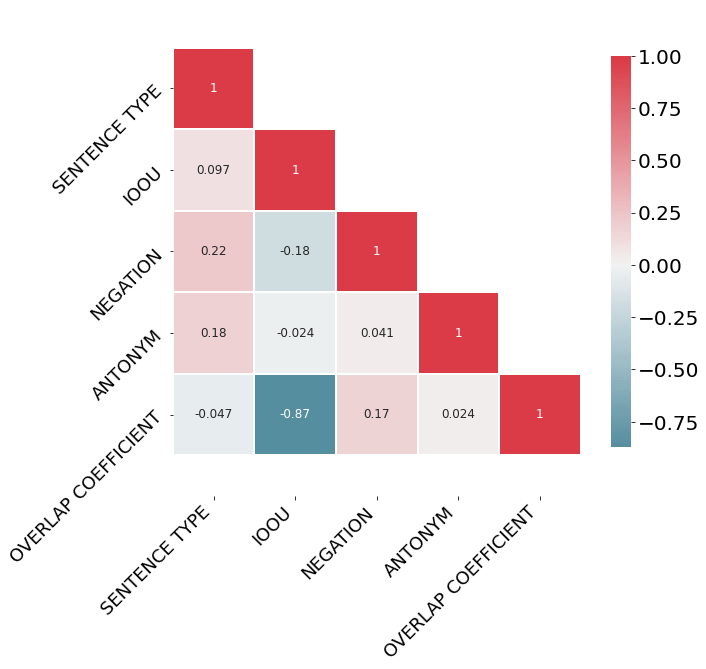

In [ ]:
make_corr(sentence_expanded_df)

In [ ]:
sentence_expanded_df.to_csv('/content/gdrive/My Drive/ContradictionDetection/figs/sentence_expanded_df_pres_100.csv')

### Process Dem Debates

In [ ]:
K = 100
total_freq_dem, self_freq_dem, other_freq_dem, appear_self_freq_dem, appear_other_freq_dem, sentence_df_dem, sentence_expanded_df_dem = process_transcript(df_dem, K)
len(sentence_expanded_df_dem)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


============ SELF FREQ ============
{'Lester Holt': 2.0, 'Savannah G': 0.0, 'Elizabeth Warren': 174.0, 'Amy Klobachar': 0.0, 'Beto O’Rourke': 1.0, 'Cory Booker': 51.0, 'Julian Castro': 10.0, 'Tulsi Gabbard': 14.0, 'Jose DB': 0.0, 'Bill de Blasio': 5.0, 'John Delaney': 9.0, 'Jay Inslee': 0.0, 'Tim Ryan': 7.0, 'Speaker 16': 0.0, 'Speaker 17': 0.0, 'Jose': 0.0, 'Bill De Blasio': 0.0, 'Savannah': 1.0, 'Amy Klobuchar': 133.0, 'Chuck Todd': 5.0, 'Rachel Maddow': 4.0, 'Jose D B': 0.0, "Norah O'Donnell": 1.0, 'Gayle King': 3.0, 'Bernie Sanders': 350.0, 'Michael Bloomberg': 5.0, 'Pete Buttigieg': 126.0, 'Tom Steyer': 22.0, 'Joe Biden': 477.0, 'Norah O’Donnel': 0.0, 'Bill Whitaker': 0.0, 'Major Garrett': 0.0, 'Speaker 1': 0.0, 'Margaret Brenna': 0.0, 'Jake Tapper': 16.0, 'Dana Bash': 4.0, 'Ilia Calderón': 0.0, 'Speaker 2': 0.0, 'Dr Sanjay Gupt': 0.0, 'Amy Langenfeld': 0.0, 'Speaker 8': 0.0, 'Speaker 6': 0.0, 'Speaker 7': 0.0, 'Anderson Cooper': 0.0, 'Savanagh G': 1.0, 'Michael Bennet': 1.0, 'Kam

1896798

In [ ]:
summary_df_dem = {'Name': [],'Total Sentences': [], 'Self Count': [], 'Other Count': [], 'Appear Self Count':[], 'Appear Other Count': [] , 'Self %': [], 'Other %': [], 'Appear Self %': [], 'Appear Other %': []}
for k in total_freq_dem:
  if k not in full_names.values(): continue
  summary_df_dem['Name'].append(k)
  summary_df_dem['Total Sentences'].append(total_freq_dem[k])
  summary_df_dem['Self Count'].append(self_freq_dem[k])
  summary_df_dem['Other Count'].append(other_freq_dem[k])
  summary_df_dem['Appear Self Count'].append(appear_self_freq_dem[k])
  summary_df_dem['Appear Other Count'].append(appear_other_freq_dem[k])
  summary_df_dem['Self %'].append(self_freq_dem[k]/total_freq_dem[k])
  summary_df_dem['Other %'].append(other_freq_dem[k]/total_freq_dem[k])
  summary_df_dem['Appear Self %'].append(appear_self_freq_dem[k]/total_freq_dem[k])
  summary_df_dem['Appear Other %'].append(appear_other_freq_dem[k]/total_freq_dem[k])


summary_df_dem = pd.DataFrame(summary_df_dem)

summary_df_dem
  


,Name,Total Sentences,Self Count,Other Count,Appear Self Count,Appear Other Count,Self %,Other %,Appear Self %,Appear Other %
0,Elizabeth Warren,1614,174.0,814.0,174,619,0.107807,0.504337,0.107807,0.383519
1,Cory Booker,593,51.0,249.0,51,480,0.086003,0.419899,0.086003,0.809444
2,Julian Castro,376,10.0,145.0,10,185,0.026596,0.385638,0.026596,0.492021
3,Tulsi Gabbard,256,14.0,165.0,14,184,0.054688,0.644531,0.054688,0.718750
4,Bill de Blasio,147,5.0,35.0,5,69,0.034014,0.238095,0.034014,0.469388
5,John Delaney,217,9.0,56.0,9,115,0.041475,0.258065,0.041475,0.529954
6,Jay Inslee,119,0.0,38.0,0,92,0.000000,0.319328,0.000000,0.773109
7,Tim Ryan,234,7.0,46.0,7,146,0.029915,0.196581,0.029915,0.623932
8,Amy Klobuchar,1277,133.0,782.0,133,575,0.104150,0.612373,0.104150,0.450274
9,Bernie Sanders,1831,350.0,876.0,350,1046,0.191152,0.478427,0.191152,0.571273


In [ ]:
summary_df_dem.to_csv('/content/gdrive/My Drive/ContradictionDetection/figs/summary_df_dem_100.csv')

In [ ]:
sentence_expanded_df_dem.to_csv('/content/gdrive/My Drive/ContradictionDetection/figs/sentence_expanded_df_dem_100.csv')

In [ ]:
sentence_expanded_df_dem = calc_feats(sentence_expanded_df_dem)
sentence_expanded_df_dem

,NAME A,NAME B,time A,time B,debate A,debate B,SENTENCE A,SENTENCE B,SENTENCE TYPE,IOOU,NEGATION,ANTONYM,OVERLAP COEFFICIENT
0,Lester Holt,Lester Holt,0:00:00,0:00:00,Debate1Night1,Debate1Night1,We’d also like to ask the audience to keep the...,… comment on every topic but over the course o...,0,0.057143,0,0,0.188323
1,Lester Holt,Lester Holt,0:00:00,0:00:00,Debate1Night1,Debate1Night1,We are not going to be shy about making sure t...,… comment on every topic but over the course o...,0,0.054054,1,0,0.189367
2,Lester Holt,Lester Holt,0:00:00,0:00:00,Debate1Night1,Debate1Night1,We are not going to be shy about making sure t...,We’d also like to ask the audience to keep the...,0,0.187500,1,0,0.157712
3,Savannah G,Lester Holt,0:00:00,0:00:00,Debate1Night1,Debate1Night1,All right so with that business out of the way...,We are not going to be shy about making sure t...,0,0.139535,1,0,0.167549
4,Savannah G,Lester Holt,0:00:00,0:00:00,Debate1Night1,Debate1Night1,All right so with that business out of the way...,… comment on every topic but over the course o...,0,0.130435,0,0,0.173323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896793,Speaker 1,Steve Kornacki,00:49:47,00:46:50,Debate9_2,Debate1Night2_2,And so begins our,Thats when all the talk ends and the voting be...,0,0.040816,0,0,0.172695
1896794,Speaker 1,Andrew Yang,00:49:47,01:08:32,Debate9_2,Debate5,And so begins our,We know that theyve found an underbelly and th...,0,0.129032,0,0,0.146107
1896795,Speaker 1,Kirsten Gillibrand,00:49:47,00:19:10,Debate9_2,Debate1Night2_1,And so begins our,We will get to Medicare for All and then your ...,0,0.048780,0,0,0.183333
1896796,Speaker 1,Amy Klobachar,00:49:47,0:04:13,Debate9_2,Debate1Night1,And so begins our,But I think my plan is a good one and my plan ...,0,0.000000,0,0,0.208480


[[False  True  True  True  True]
 [False False  True  True  True]
 [False False False  True  True]
 [False False False False  True]
 [False False False False False]]


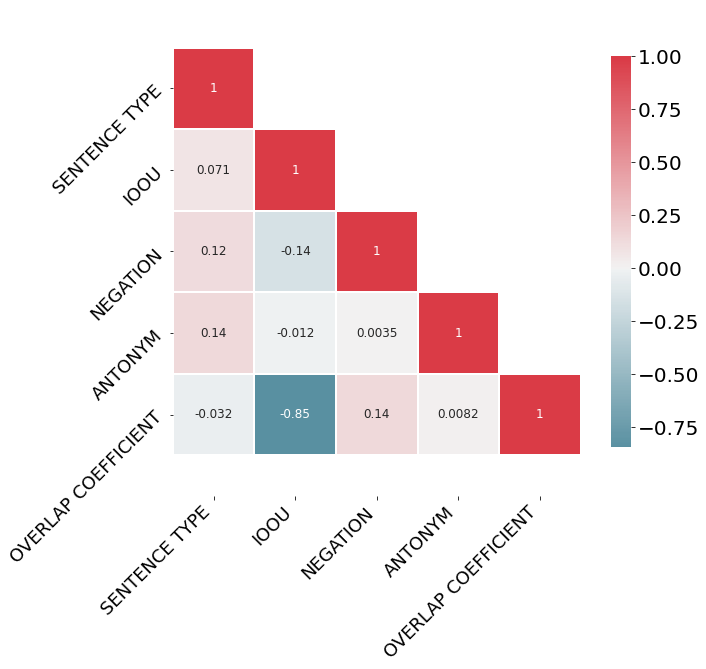

In [ ]:
make_corr(sentence_expanded_df_dem)

## Speaker Diarization

In [ ]:

!pip install -r '/content/gdrive/My Drive/ContradictionDetection/lib/pyAudioAnalysis/requirements.txt'

In [ ]:
!sudo apt-get install ffmpeg
!sudo apt-get install python3-magic
!pip install python-magic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-magic is already the newest version (2:0.4.15-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


88.1	88.1


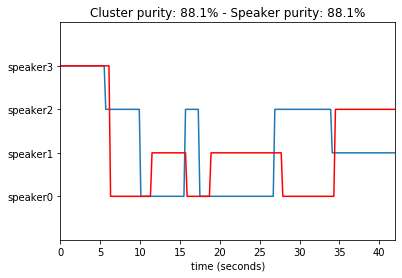

In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive/ContradictionDetection/lib/pyAudioAnalysis/pyAudioAnalysis')
from audioAnalysis import speakerDiarizationWrapper
from audioSegmentation import speaker_diarization
p = speakerDiarizationWrapper("/content/gdrive/My Drive/ContradictionDetection/lib/pyAudioAnalysis/pyAudioAnalysis/data/diarizationExample.wav", 4, False)


64.8	64.8


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 5 - 1) = 4 components.

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).



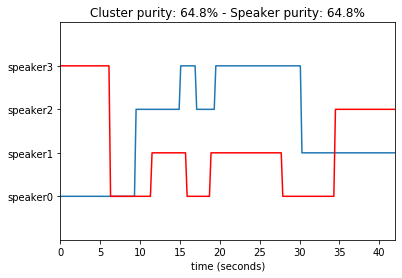

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [ ]:
inputFile = "/content/gdrive/My Drive/ContradictionDetection/lib/pyAudioAnalysis/pyAudioAnalysis/data/diarizationExample.wav"
numSpeakers = 4
speaker_diarization(inputFile, numSpeakers, plot_res=True)

In [ ]:
!pip install --upgrade google-cloud-speech

     |████████████████████████████████| 92kB 3.9MB/s 


In [ ]:
from google.cloud import speech_v1p1beta1 as speech
client = speech.SpeechClient()

speech_file = '/content/gdrive/My Drive/ContradictionDetection/lib/pyAudioAnalysis/pyAudioAnalysis/data/diarizationExample.wav'

with open(speech_file, 'rb') as audio_file:
    content = audio_file.read()

audio = speech.types.RecognitionAudio(content=content)

config = speech.types.RecognitionConfig(
    encoding=speech.enums.RecognitionConfig.AudioEncoding.LINEAR16,
    sample_rate_hertz=8000,
    language_code='en-US',
    enable_speaker_diarization=True,
    diarization_speaker_count=2)

print('Waiting for operation to complete...')
response = client.recognize(config, audio)

# The transcript within each result is separate and sequential per result.
# However, the words list within an alternative includes all the words
# from all the results thus far. Thus, to get all the words with speaker
# tags, you only have to take the words list from the last result:
result = response.results[-1]

words_info = result.alternatives[0].words

# Printing out the output:
for word_info in words_info:
    print(u"word: '{}', speaker_tag: {}".format(
        word_info.word, word_info.speaker_tag))

DefaultCredentialsError: ignored

## Figures


In [ ]:
import matplotlib.pyplot as plt
figpath = "/content/gdrive/My Drive/ContradictionDetection/figs/"

### Train Test Graphs

In [ ]:
train_stats = pd.read_csv(figpath + "training_epochs.csv")
train_stats.head()

,epoch,train_loss,val_loss,train_acc,val_acc
0,1,0.532,5725.549,85.714,21.195
1,2,0.410,6666.092,89.979,21.195
2,3,0.418,7464.914,90.476,21.195
3,4,0.429,8054.381,90.921,21.195
4,5,0.436,8128.680,91.104,21.195


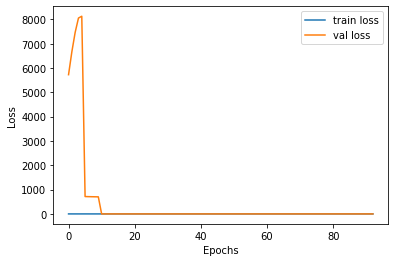

In [ ]:
#Train vs Validation loss overall
mark = -1
plt.plot(train_stats.index.values[:mark], train_stats['train_loss'][:mark], label='train loss')
plt.plot(train_stats.index.values[:mark], train_stats['val_loss'][:mark], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


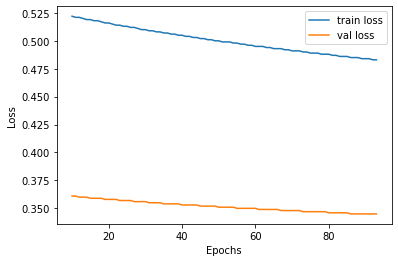

In [ ]:
#Train vs Validation loss during finetuning
mark = 10
plt.plot(train_stats.index.values[mark:], train_stats['train_loss'][mark:], label='train loss')
plt.plot(train_stats.index.values[mark:], train_stats['val_loss'][mark:], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

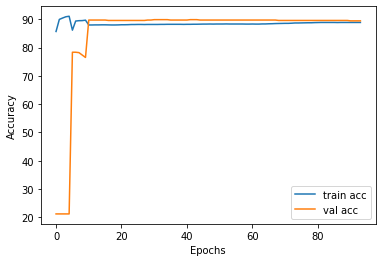

In [ ]:
#Train vs Validation Accuracy Overall
mark = 0
plt.plot(train_stats.index.values[mark:], train_stats['train_acc'][mark:], label='train acc')
plt.plot(train_stats.index.values[mark:], train_stats['val_acc'][mark:], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

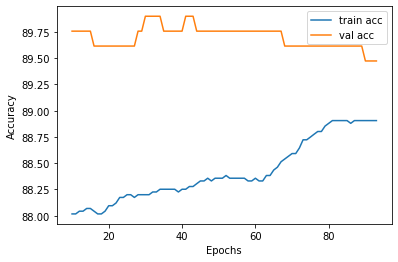

In [ ]:
#Train vs Validation Accuracy Finetuning
mark = 10
plt.plot(train_stats.index.values[mark:], train_stats['train_acc'][mark:], label='train acc')
plt.plot(train_stats.index.values[mark:], train_stats['val_acc'][mark:], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Correlation Matrix

In [ ]:
train_data.corr(method='pearson')

,S.NO.,SENTENCE TYPE,IOOU,NEGATION,ANTONYM,OVERLAP COEFFICIENT
S.NO.,1.000000,-0.391213,-0.201333,-0.161227,-0.056107,-0.231710
SENTENCE TYPE,-0.391213,1.000000,0.575504,0.594016,0.114469,0.536321
IOOU,-0.201333,0.575504,1.000000,0.307164,0.101160,0.898856
NEGATION,-0.161227,0.594016,0.307164,1.000000,-0.197753,0.313989
ANTONYM,-0.056107,0.114469,0.101160,-0.197753,1.000000,0.052569
OVERLAP COEFFICIENT,-0.231710,0.536321,0.898856,0.313989,0.052569,1.000000


In [ ]:
import seaborn as sns

def make_corr(df):
  corr = df.corr()
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
  # print(np.diag(mask.shape[0]))
  mask[np.diag_indices_from(mask)] = False
  print(mask)
  f, ax = plt.subplots(figsize=(11, 9))

  # sns.set(font_scale=1.25)
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
              square=True, linewidths=1, cbar_kws={"shrink": 0.8}, annot = True,
                        annot_kws = {"size": 12})

  cbar = ax.collections[0].colorbar
  cbar.ax.tick_params(labelsize=20)

  ax.set_xticklabels(
      ax.get_xticklabels(),
      rotation=45,
      horizontalalignment='right',
      fontsize=18
  );
  ax.set_yticklabels(
      ax.get_yticklabels(),
      rotation=45,
      horizontalalignment='right',
      fontsize=18
  );
  bottom, top = ax.get_ylim()
  ax.set_ylim(bottom+0.5, top-0.5)

[[False  True  True  True  True  True]
 [False False  True  True  True  True]
 [False False False  True  True  True]
 [False False False False  True  True]
 [False False False False False  True]
 [False False False False False False]]


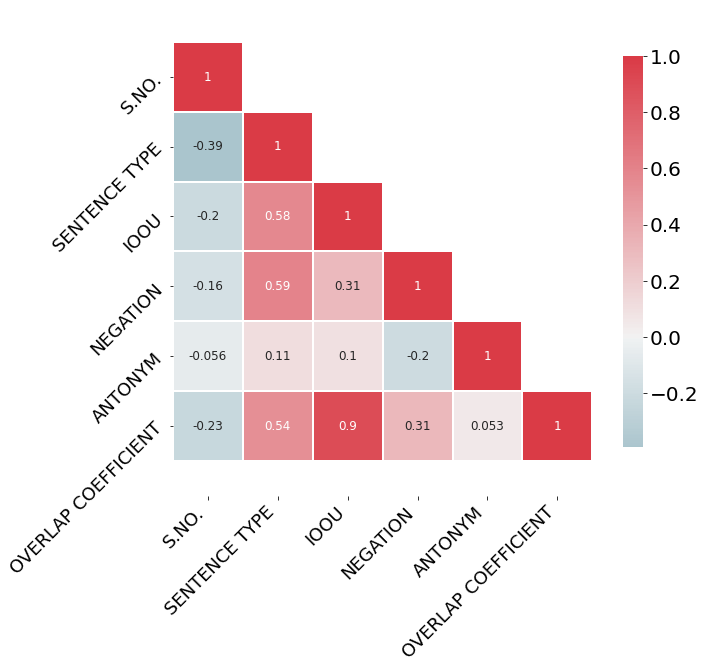

In [ ]:
make_corr(train_data)

[[False  True  True  True  True  True]
 [False False  True  True  True  True]
 [False False False  True  True  True]
 [False False False False  True  True]
 [False False False False False  True]
 [False False False False False False]]


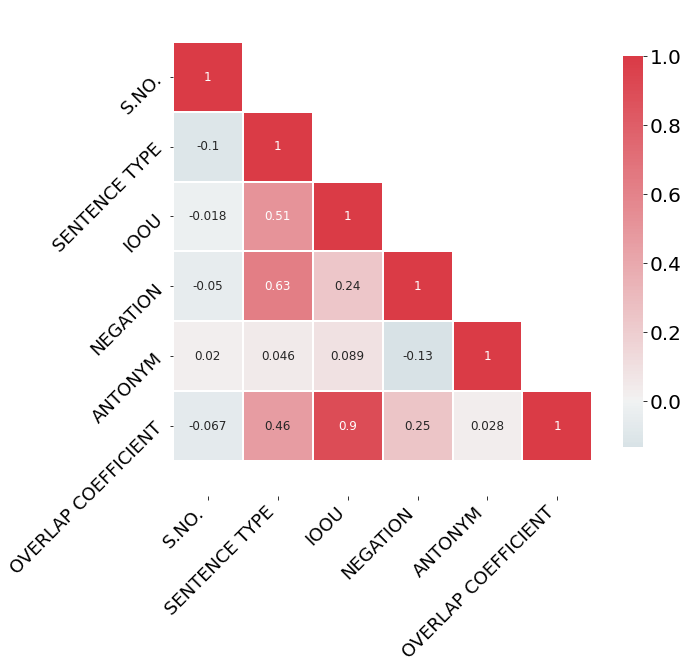

In [ ]:
make_corr(test_data)

[[False  True  True  True  True]
 [False False  True  True  True]
 [False False False  True  True]
 [False False False False  True]
 [False False False False False]]


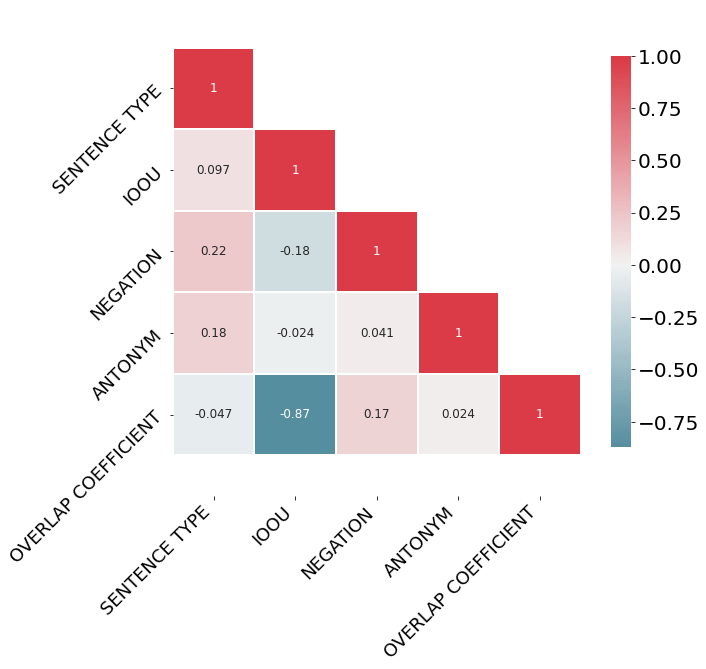

In [ ]:
make_corr(sentence_expanded_df)

In [ ]:
df_pres

,name,time,script,debate
0,Chris Wallace,00:01:20,Good evening from the Health Education Campus ...,PresidentialDebate1_1
1,Chris Wallace,00:02:10,This debate is being conducted under health an...,PresidentialDebate1_1
2,Joe Biden,00:02:49,"How you doing, man?",PresidentialDebate1_1
3,Donald Trump,00:02:51,How are you doing?,PresidentialDebate1_1
4,Joe Biden,00:02:51,I'm well.,PresidentialDebate1_1
...,...,...,...,...
1300,Joe Biden,00:25:57,"I will say, I'm an American President. I repre...",PresidentialDebate2_3
1301,Joe Biden,00:26:19,"We can grow this economy, we can deal with the...",PresidentialDebate2_3
1302,Kristen Welker,00:26:53,"All right, I want to thank you both for a very...",PresidentialDebate2_3
1303,Joe Biden,00:27:16,Thank you.,PresidentialDebate2_3


0    1940
Name: ANTONYM, dtype: int64

### Box Plot

In [ ]:
def make_box(df):
  df.boxplot(column=['SENTENCE TYPE','IOOU', 'NEGATION', 'ANTONYM', 'OVERLAP COEFFICIENT'])

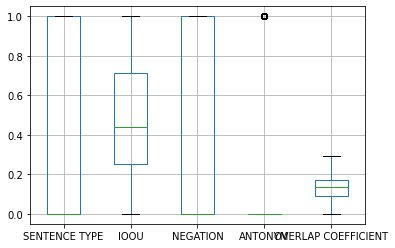

In [ ]:
make_box(train_data)

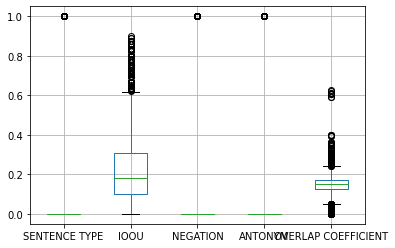

In [ ]:
make_box(sentence_expanded_df)

0    127
1     13
Name: ANTONYM, dtype: int64

In [ ]:
df_pheme['SENTENCE TYPE'].value_counts()

0    1513
1     427
Name: SENTENCE TYPE, dtype: int64